In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.spatial import distance

In [2]:
info = pd.read_csv(r"C:\Users\dodie\Downloads\fall 24\ese 527\patient_information.csv")
#info = pd.read_csv('/Users/dylanmack/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/ESE 527/EMR/patient_information.csv')
info.head()

,PID,Age,Ht,Wt,Gender,OR_start,OR_end,Surgery_start,Surgery_end,Procedure
0,56d1bc3e2a07cc1a,19,160,51,F,1/1/16 7:30,1/1/16 15:25,1/1/16 8:29,1/1/16 15:14,"Funtional rhinoplasty, repair of vestibular st..."
1,411a637540c1d665,51,162,71,F,12/26/16 7:11,12/26/16 8:32,12/26/16 7:50,12/26/16 8:21,"Excision Ganglion Cyst left dorsal hand,splint..."
2,51206705422a4c5c,41,165,58,F,6/19/16 8:15,6/19/16 13:37,6/19/16 8:57,6/19/16 13:37,"Abdominoplasty, Bilateral Flank Liposuction"
3,40750c9577f139bd,55,162,66,F,12/11/15 13:13,12/11/15 20:09,12/11/15 14:07,12/11/15 19:51,"1.Bilateral endoscopic sinus surgery, inferior..."
4,ed4ac97e460b5a79,41,158,76,F,4/18/16 7:11,4/18/16 9:31,4/18/16 8:07,4/18/16 9:31,Left breast: Tissue expander Exchange for Sili...


In [3]:
info_new = info[['PID']].copy()
info_new['Age'] = info['Age'].apply(lambda x: int(x))
info_new['Ht'] = info['Ht'].apply(lambda x: int(x) if x != '\\N' else 0)
info_new['Wt'] = info['Wt'].apply(lambda x: int(x))
info_new.loc[:,'Sex'] = info.loc[:,'Gender'].apply(lambda x: 1 if x == 'F' else 0)
info_new.loc[:,'OR_time'] = (pd.to_datetime(info.loc[:,'OR_end'])-pd.to_datetime(info.loc[:,'OR_start'])).apply(lambda x: x.total_seconds()/60)
info_new.loc[:,'Surgery_time'] = (pd.to_datetime(info.loc[:,'Surgery_end'])-pd.to_datetime(info.loc[:,'Surgery_start'])).apply(lambda x: x.total_seconds()/60)
info_new.loc[:,'Procedure'] = info.loc[:,'Procedure']

info_new = info_new[info_new['Ht'] != 0]
info_new = info_new[info_new['OR_time'] < 10000]

info_new['age_group'] = info_new['Age'].apply(lambda x: 'child' if x < 19 else ('elder' if x > 64 else 'adult'))

info_new.head()

,PID,Age,Ht,Wt,Sex,OR_time,Surgery_time,Procedure,age_group
0,56d1bc3e2a07cc1a,19,160,51,1,475.0,405.0,"Funtional rhinoplasty, repair of vestibular st...",adult
1,411a637540c1d665,51,162,71,1,81.0,31.0,"Excision Ganglion Cyst left dorsal hand,splint...",adult
2,51206705422a4c5c,41,165,58,1,322.0,280.0,"Abdominoplasty, Bilateral Flank Liposuction",adult
3,40750c9577f139bd,55,162,66,1,416.0,344.0,"1.Bilateral endoscopic sinus surgery, inferior...",adult
4,ed4ac97e460b5a79,41,158,76,1,140.0,84.0,Left breast: Tissue expander Exchange for Sili...,adult


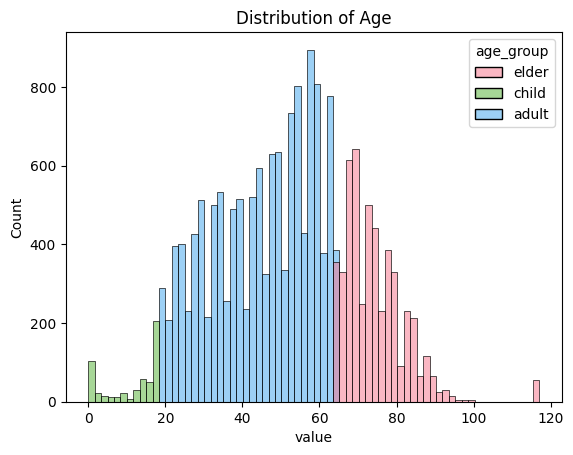

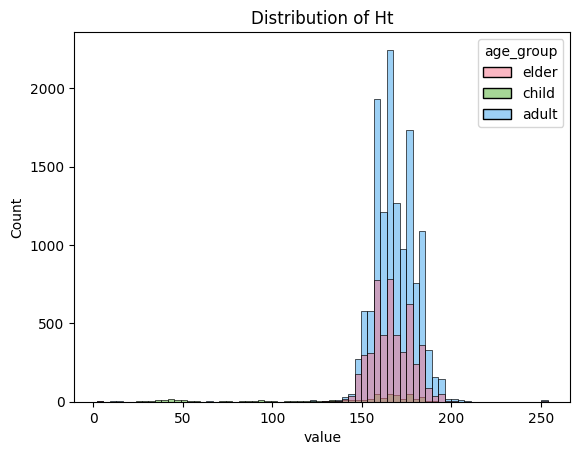

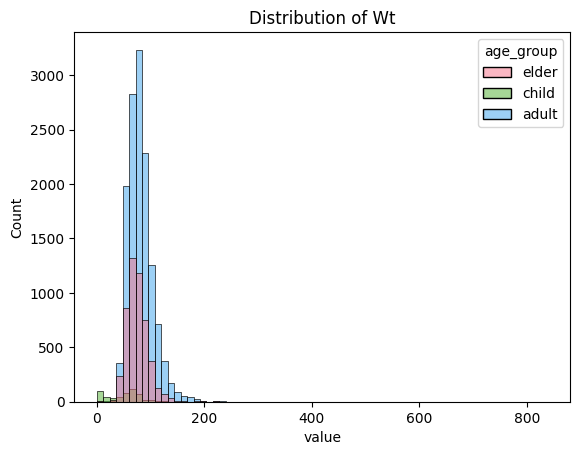

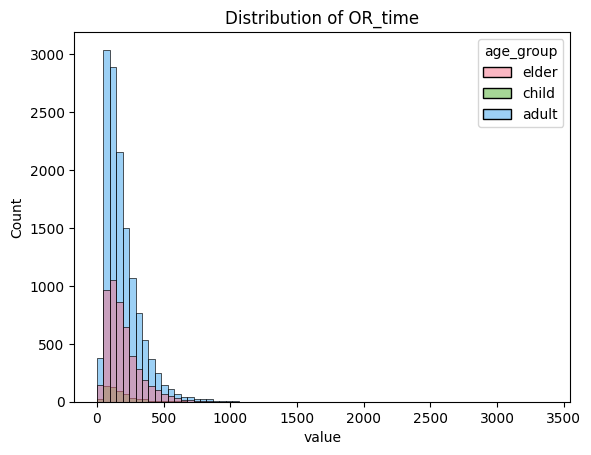

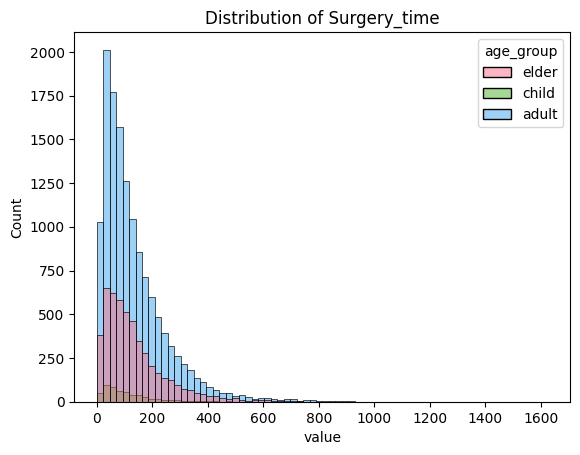

In [4]:
for var in ['Age','Ht','Wt','OR_time','Surgery_time']:
    to_plot = info_new.melt(id_vars='age_group', value_vars=var, var_name='variable', value_name='value')
    to_plot['age_group'] = pd.Categorical(to_plot['age_group'], categories=reversed(sorted(to_plot['age_group'].unique())), ordered=True)
    palette = sns.color_palette("husl", n_colors=len(to_plot['age_group'].unique()))

    plt.figure()
    sns.histplot(data=to_plot, x='value', hue='age_group', multiple='layer', bins=70, alpha=0.5, palette=palette)
    plt.title(f'Distribution of {var}')
    plt.show()

In [5]:
for var in ['Age','Ht','Wt','Sex','OR_time','Surgery_time']:
    print(f'\nFor variable {var}:')
    for g in ['child','adult','elder']:
        print(f'In class {g},')
        if var=='Sex':
            print(f'mode={stats.mode(info_new[info_new["age_group"]==g][var]).mode[0]} (1=female,0=male)')
            print(f'class balance: {np.sum(info_new[info_new["age_group"]==g][var])} female to {len(info_new[info_new["age_group"]==g])-np.sum(info_new[info_new["age_group"]==g][var])} male\n')
        else:
            print(f'mean={np.mean(info_new[info_new["age_group"]==g][var])}')
            print(f'standard deviation={np.std(info_new[info_new["age_group"]==g][var])}\n')


For variable Age:
In class child,
mean=11.59252336448598
standard deviation=6.918642038097017

In class adult,
mean=44.93006837098692
standard deviation=12.91272034796935

In class elder,
mean=74.33546837469976
standard deviation=8.115358170246447


For variable Ht:
In class child,
mean=137.89719626168224
standard deviation=48.31650606670759

In class adult,
mean=168.25401307966706
standard deviation=12.163306716043817

In class elder,
mean=166.61729383506807
standard deviation=12.073171179619543


For variable Wt:
In class child,
mean=49.472897196261684
standard deviation=31.317468685659794

In class adult,
mean=80.318742568371
standard deviation=23.891559650989652

In class elder,
mean=74.72598078462771
standard deviation=27.55649218874256


For variable Sex:
In class child,
mode=0 (1=female,0=male)
class balance: 210 female to 325 male

In class adult,
mode=1 (1=female,0=male)
class balance: 6969 female to 6487 male

In class elder,
mode=0 (1=female,0=male)
class balance: 2487 fema

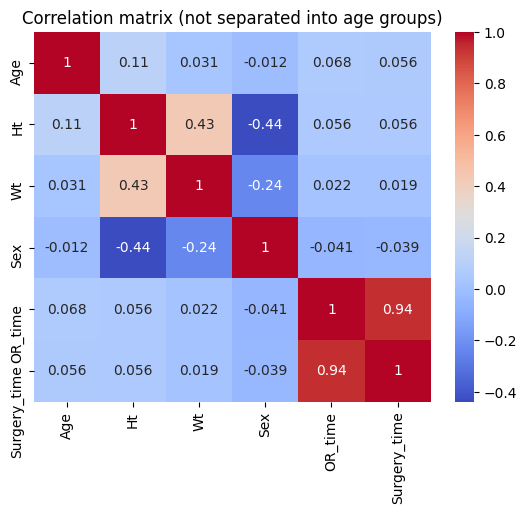

In [6]:
cor_mat = info_new[['Age','Ht','Wt','Sex','OR_time','Surgery_time']].corr()
sns.heatmap(cor_mat,cmap='coolwarm',annot=True)
plt.title('Correlation matrix (not separated into age groups)')
plt.show()

# Outlier Detection

In [7]:
data = pd.DataFrame()

for c in ['child','adult','elder']:
    small_data = info_new[info_new['age_group']==c].copy()
    num_data = small_data[['Age','Ht','Wt','Sex','OR_time','Surgery_time']]
    mu = list(np.mean(num_data))
    iv = np.linalg.inv(num_data.cov())
    small_data['Mahalanobis'] = num_data.apply(lambda x: distance.mahalanobis(x,mu,iv),axis=1)
    thresh = np.quantile(list(small_data['Mahalanobis']),0.95)
    print(f'removing {len(small_data[small_data["Mahalanobis"] >= thresh])} outliers from {c} class')
    data = pd.concat([data, small_data[small_data['Mahalanobis'] < thresh]], ignore_index=True)

removing 27 outliers from child class
removing 673 outliers from adult class
removing 250 outliers from elder class


In [8]:
data

,PID,Age,Ht,Wt,Sex,OR_time,Surgery_time,Procedure,age_group,Mahalanobis
0,7ffc872e4ee6d726,18,160,55,1,92.0,38.0,Vulvar vestibulectomy,child,2.090666
1,f67a226c31c144d1,18,162,50,1,330.0,271.0,Septorhinoplasty with bilateral spreader graft...,child,2.547105
2,f2adf94b6dcdc0d1,8,142,36,0,177.0,119.0,"Pars plana vitrectomy, pars plana lensectomy, ...",child,1.732004
3,108d3917c36ddd20,5,110,20,1,41.0,20.0,1) skin tag removal 17 lesions\n2) Kenalog inj...,child,2.405138
4,cffce6c5de30e8f3,12,137,30,0,143.0,38.0,Stage II Deep Brain Stimulator Battery Placeme...,child,2.786817
...,...,...,...,...,...,...,...,...,...,...
18032,178ad771cb5e922c,78,182,86,0,184.0,114.0,left totatl hip arthroplasty,elder,1.429176
18033,62f7f4d74cdc7c17,80,175,85,0,95.0,33.0,"Cystoscopy, Transurethral Resection of Bladder...",elder,1.502426
18034,1397649136a406b4,71,170,76,0,120.0,84.0,Open left inguinal hernia repair with mesh,elder,1.386000
18035,c5d8f78ddb9e74a0,66,185,90,0,101.0,42.0,Hemorrhoidectomy,elder,2.060725


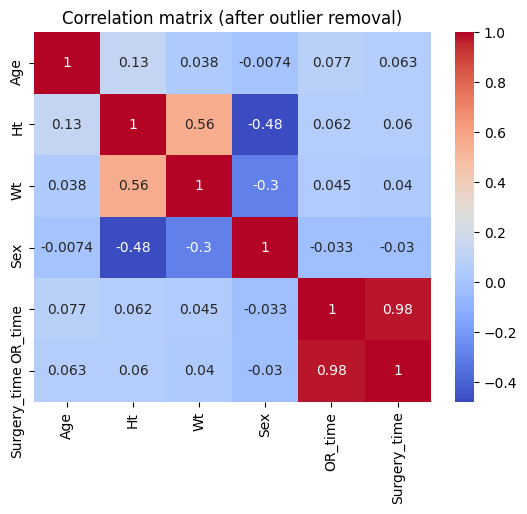

In [9]:
cor_mat_new = data[['Age','Ht','Wt','Sex','OR_time','Surgery_time']].corr()
sns.heatmap(cor_mat_new,cmap='coolwarm',annot=True)
plt.title('Correlation matrix (after outlier removal)')
plt.show()